# ***EDA***

Exploratory Data Analysis (EDA) is an approach for data analysis that employs a variety of techniques (mostly graphical) to-

1. maximize insight into a data set
2. uncover underlying structure
3. extract important variables
4. detect outliers and anomalies
5. test underlying assumptions
6. develop parsimonious models
7. determine optimal factor settings.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy as scipy
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/wine-clustering.csv")

# **Understanding The Data**

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
df.shape

(178, 13)

So there are 178 rows and 13 columns in the data set.


In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [8]:
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

# **Cleaning The Data**

In [9]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

since the dataset have no null value now we have to drop redundent data.So we remove 'Ash_Alcanity'and 'OD280'. 

In [10]:
wine=df.drop(['Ash_Alcanity','OD280'],axis=1)

In [11]:
wine.head()

,Alcohol,Malic_Acid,Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
0,14.23,1.71,2.43,127,2.80,3.06,0.28,2.29,5.64,1.04,1065
1,13.20,1.78,2.14,100,2.65,2.76,0.26,1.28,4.38,1.05,1050
2,13.16,2.36,2.67,101,2.80,3.24,0.30,2.81,5.68,1.03,1185
3,14.37,1.95,2.50,113,3.85,3.49,0.24,2.18,7.80,0.86,1480
4,13.24,2.59,2.87,118,2.80,2.69,0.39,1.82,4.32,1.04,735


# **Skewness**

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed

If the skewness is less than -1 or greater than 1, the data are highly skewed

In [12]:
wine.skew().sort_values(ascending=True)

Ash                    -0.176699
Alcohol                -0.051482
Hue                     0.021091
Flavanoids              0.025344
Total_Phenols           0.086639
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Proline                 0.767822
Color_Intensity         0.868585
Malic_Acid              1.039651
Magnesium               1.098191
dtype: float64

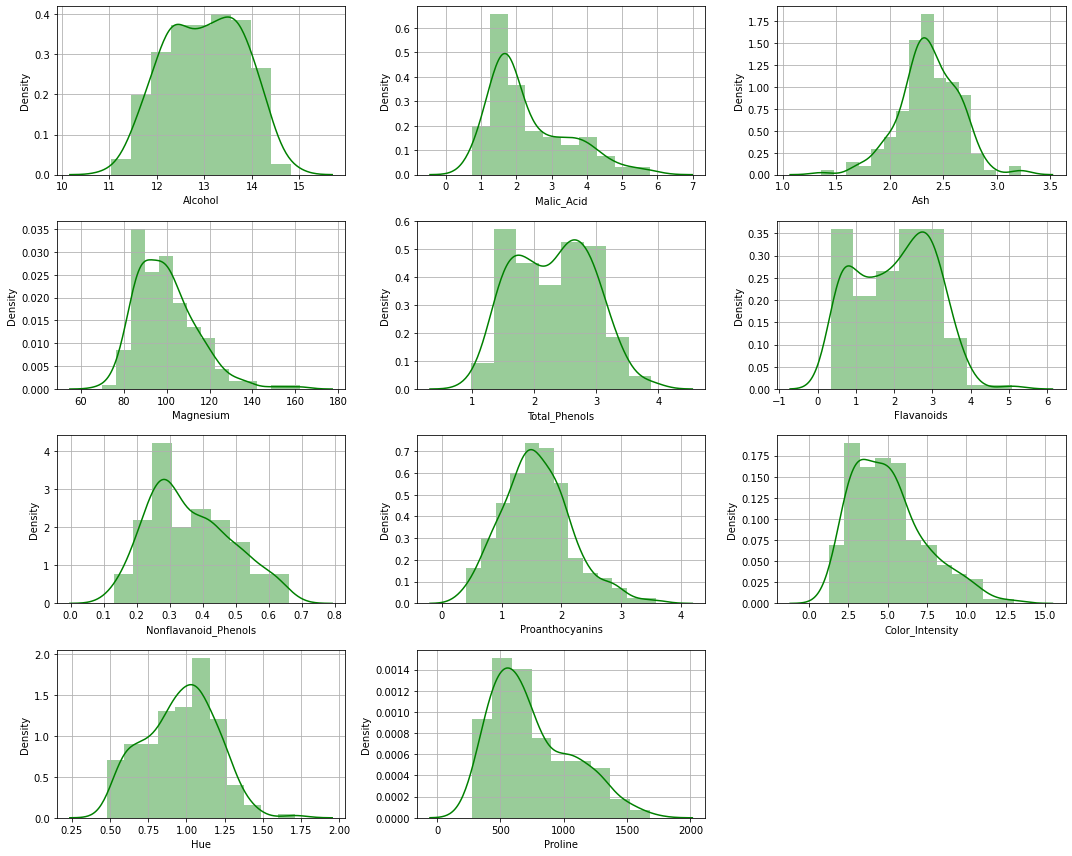

In [13]:
plt.figure(figsize=(15,12))
for i,col in enumerate(list(wine.columns.values)):
  plt.subplot(4,3,i+1)
  sns.distplot(wine[col],color='g',kde=True)
  plt.grid()
  plt.tight_layout()



*   Ash and Alcohol are negetively skewed
*   All other variables are positively skewed.



# **Scaling**

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

In [14]:
columns = wine.columns
scaler = StandardScaler()

data = scaler.fit_transform(wine)

wine = pd.DataFrame(data=data, columns=columns)
wine.head()

,Alcohol,Malic_Acid,Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
0,1.518613,-0.562250,0.232053,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.013009
1,0.246290,-0.499413,-0.827996,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,0.965242
2,0.196879,0.021231,1.109334,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,1.395148
3,1.691550,-0.346811,0.487926,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,2.334574
4,0.295700,0.227694,1.840403,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,-0.037874


# **Relationship Analysis**

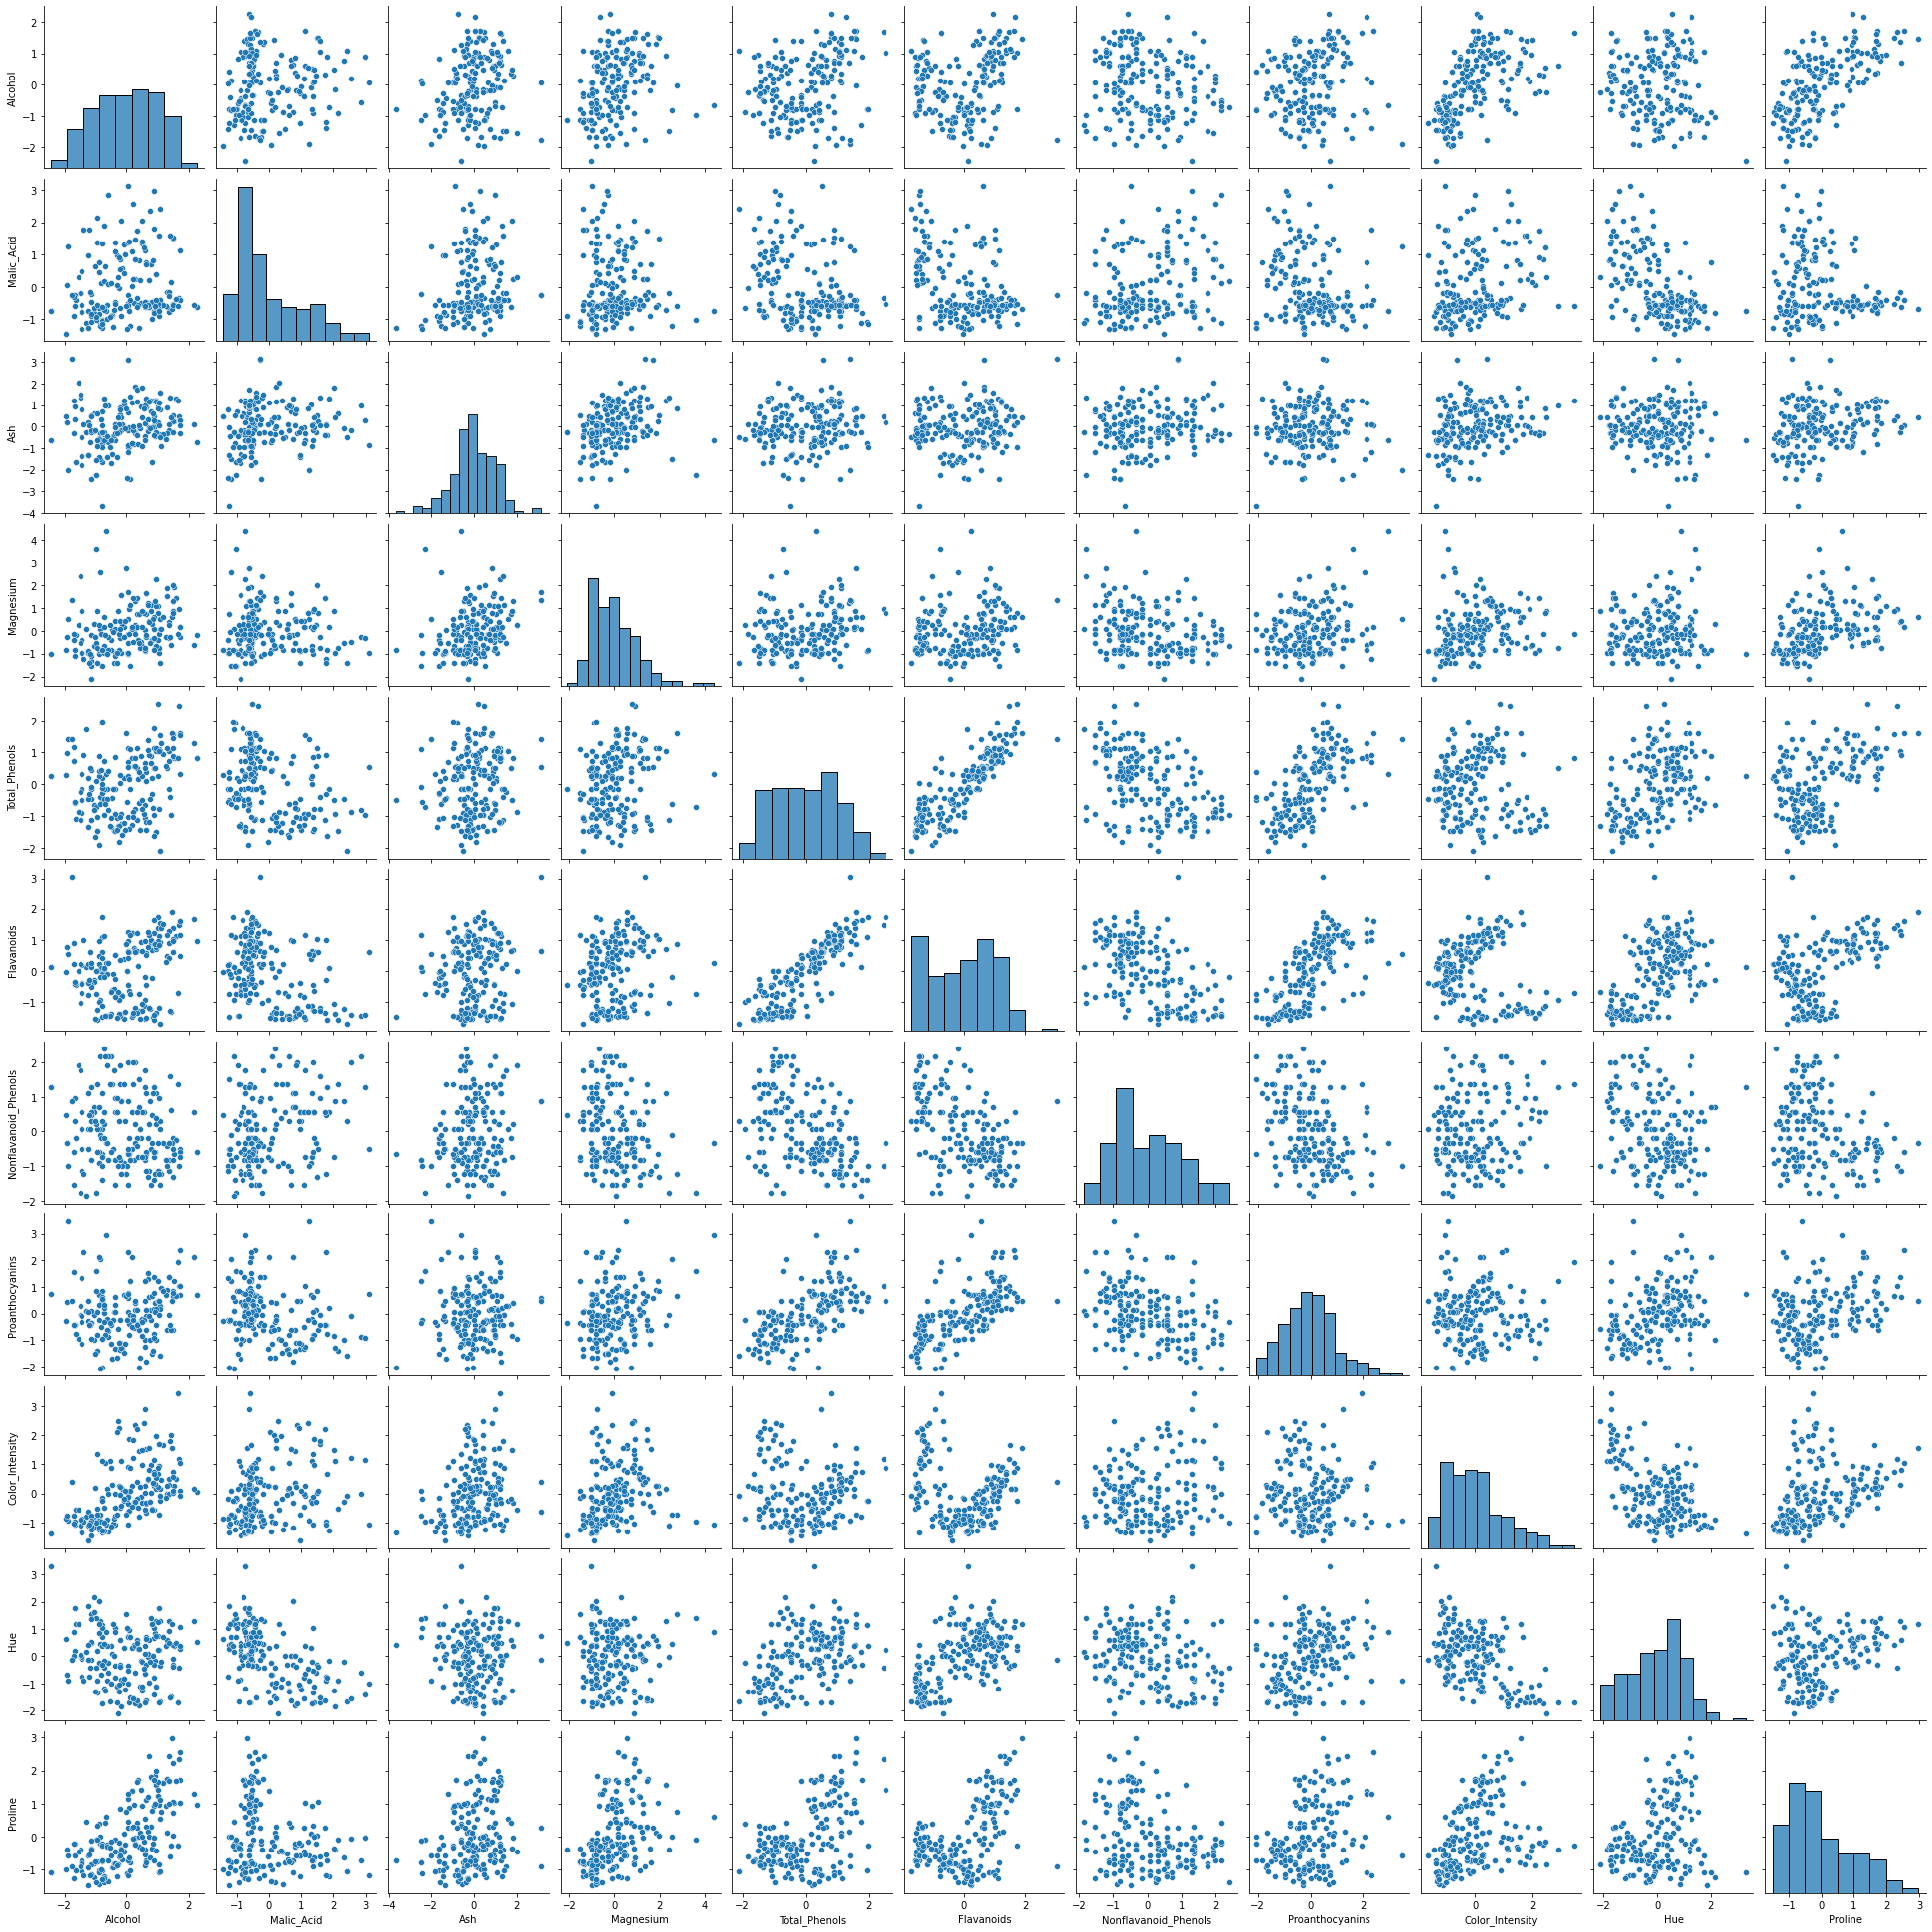

In [15]:
sns.pairplot(wine)

The above plot shows the relation between variables.
From the plots we can say that none of this attribute is normally distributed.

# **Shapiro Wilk Test**

In [16]:
stats.shapiro(wine)

(0.9853732585906982, 2.928830951636624e-13)

Data is not normally distributed.

**The corelation coefficent are shown in the following plots**

---



In [17]:
corelation = wine.corr()

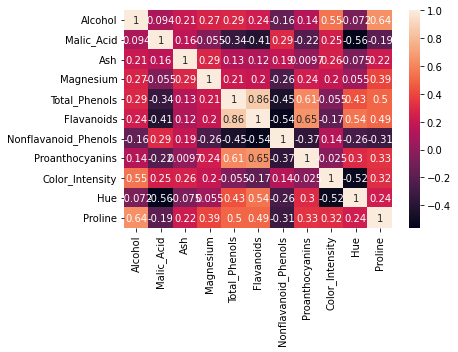

In [18]:
sns.heatmap(corelation , xticklabels=corelation.columns ,yticklabels=corelation.columns , annot=True)

Most of the variables are linearly corelated.

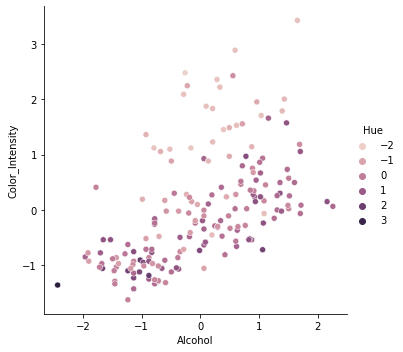

In [19]:
sns.relplot(x='Alcohol',y='Color_Intensity',hue='Hue', data=wine)

There is positive corelation between  two variables Color_Intensity and Alcohol.

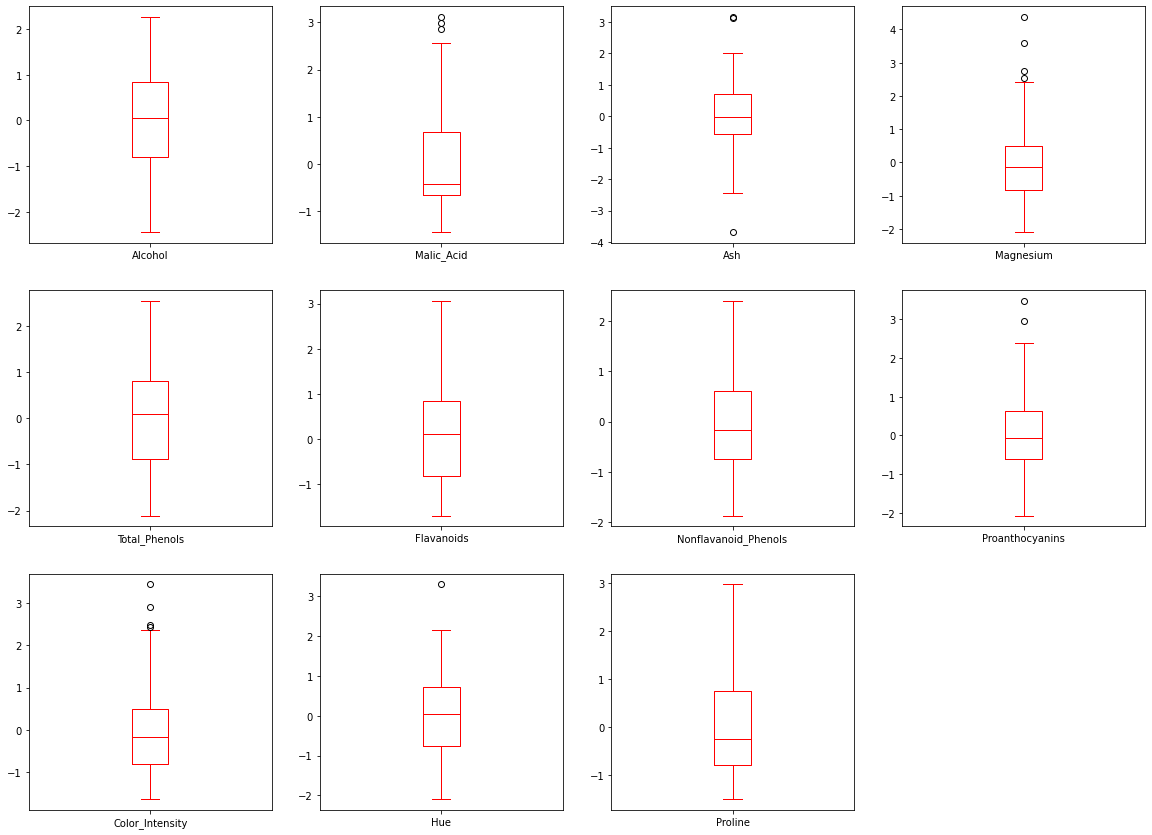

In [20]:
wine.plot(kind="box", subplots = True,layout = (4,4),figsize=(20,20),color='red')
plt.show()

There are outlairs in many variables.The variables are- 

1)Mailc _Acid

2) Ash


3)  Magnesium

4)  Proanthocyanins 


5)   Color_Intensity 









